In [8]:
import pandas as pd
df=pd.read_csv('E:regresi.csv', sep=';')
df.head()

,y,x1,x2
0,66.32,2847.09,7.92
1,69.17,5229.55,8.46
2,71.48,7826.41,9.21
3,68.58,8655.57,8.11
4,66.25,4873.72,8.04


In [9]:
df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [10]:
df.shape

(15, 3)

In [11]:
df.dtypes

y     float64
x1    float64
x2    float64
dtype: object

In [14]:
df[df.isnull().any(axis=1)]

,y,x1,x2


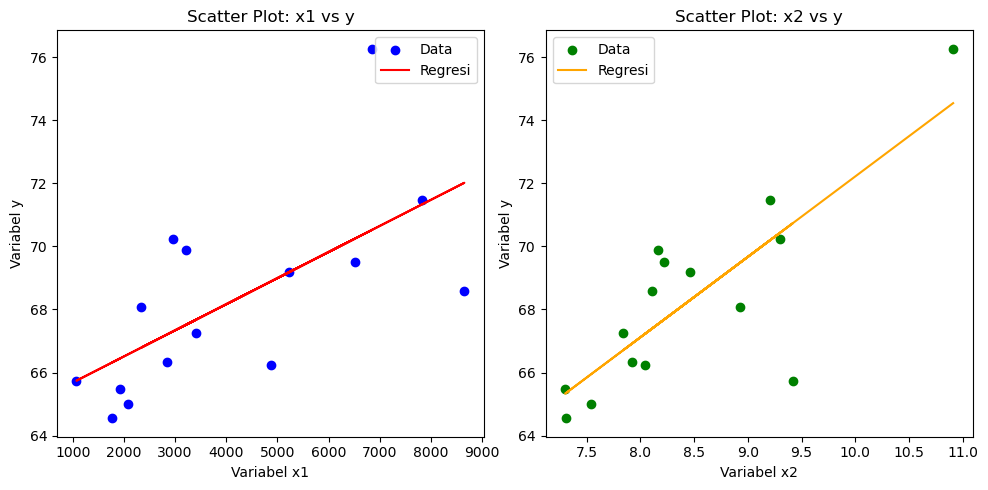

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot 1: Variabel X1 dan Y dengan garis regresi
m1, c1 = np.polyfit(df['x1'], df['y'], 1)  # Menghitung koefisien m (slope) dan c (intercept) untuk X1 dan Y
garis_regresi = m1 * df['x1'] + c1  # Membuat persamaan garis regresi X1 dan Y

axes[0].scatter(df['x1'], df['y'], color='blue', label='Data')
axes[0].plot(df['x1'], garis_regresi, color='red', label='Regresi')
axes[0].set_xlabel('Variabel x1')
axes[0].set_ylabel('Variabel y')
axes[0].set_title('Scatter Plot: x1 vs y')
axes[0].legend()

# Scatter plot 2: Variabel X2 dan Y dengan garis regresi
m2, c2 = np.polyfit(df['x2'], df['y'], 1)  # Menghitung koefisien m (slope) dan c (intercept) untuk X2 dan Y
garis_regresi2 = m2 * df['x2'] + c2  # Membuat persamaan garis regresi X2 dan Y

axes[1].scatter(df['x2'], df['y'], color='green', label='Data')
axes[1].plot(df['x2'], garis_regresi2, color='orange', label='Regresi')
axes[1].set_xlabel('Variabel x2')
axes[1].set_ylabel('Variabel y')
axes[1].set_title('Scatter Plot: x2 vs y')
axes[1].legend()

# Menampilkan scatter plot
plt.tight_layout()
plt.show()


In [22]:
#uji normalitas
#bertujuan untuk melihat distribusi dari residual model yang terbentuk

from scipy import stats
import statsmodels.api as sm

X = df[['x1', 'x2']]  # Variabel independen X1 dan X2
X = sm.add_constant(X)  # Menambahkan kolom konstanta untuk intercept
Y = df['y']           # Variabel dependen Y

model = sm.OLS(Y, X)    # Membangun model regresi linier
results = model.fit()   # Melakukan fitting model ke data

# Residual
residuals = results.resid

# Uji normalitas residual dengan Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print("Nilai statistik uji Shapiro-Wilk:", shapiro_test.statistic)
print("Nilai p-value:", shapiro_test.pvalue)

Nilai statistik uji Shapiro-Wilk: 0.96044921875
Nilai p-value: 0.700205385684967


In [23]:
#uji Heteroskedastisitas
#untuk mendeteksi kehomogenan variansi residual

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X)
print("Nilai statistik uji Breusch-Pagan:", bp_test[0])
print("Nilai p-value:", bp_test[1])

Nilai statistik uji Breusch-Pagan: 2.061399945759627
Nilai p-value: 0.35675715281836956


In [33]:
#uji aoutokorelasi
#bertujuan untuk menguji apakah terjadi korelasi antara residual pada waktu atau ruang sebelumnya

from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals)

print("Nilai statistik uji Durbin-Watson:", dw_test)

Nilai statistik uji Durbin-Watson: 2.322246096857647


In [35]:
#uji multikolinearitas
#bertujuan untuk memeriksa apakah didalam sebuah model regresi terdapat interkorelasi antar variabel independent

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variabel"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variabel        VIF
0    const  84.701683
1       x1   1.123790
2       x2   1.123790


In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     26.10
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           4.27e-05
Time:                        19:05:29   Log-Likelihood:                -24.944
No. Observations:                  15   AIC:                             55.89
Df Residuals:                      12   BIC:                             58.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2775      3.391     14.237      0.0

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#dari summary model diatas dapat dilihat bahwa
#1.secara parsial variabel x1 dan x2 berpengaruh signifikan terhadap variabel y, hal ini dapat dilihat dari t hitung lebih besar dari t tabel dan p value < 5%
#2.secara simultan/serentak variabel bebas x1 dan x2 berpengaruh signifikan terhadap variabel terikat y, hal ini dapat dilihat dari nilai f hitung lebih dari f tabel
#3.R-square yang bernilai 0.813 bermakna bahwa akurasi model yang dihasilkan sudah cukup baik.

In [45]:
b0 = results.params['const']
b1 = results.params['x1']
b2 = results.params['x2']

print('Model regresi yang terbentuk adalah')
print('y=',b0,'+',b1,'x1 +',b2,'x2')

Model regresi yang terbentuk adalah
y= 48.27748744505888 + 0.0005467462030001437 x1 + 2.0993245516435977 x2


In [ ]:
#berdasarkan model diatas dapat disimpulkan bahwa setiap peningkatan satu satuan x1 maka nilai y akan bertambah sebesar 0.00054 dan setiap peningkatan satu satuan x2 maka y akan mengalami peningkatan sebesar 2.099